# Eksplorasi Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
import re
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [4]:
train_df = pd.read_csv('/kaggle/input/data-mining-final-action-2025/train.csv')

print("=== BASIC DATASET INFORMATION ===")
print(f"Dataset shape: {train_df.shape}")
print(f"Columns: {list(train_df.columns)}")
print(f"\nFirst 5 rows:")
print(train_df.head())

print(f"\nDataset info:")
print(train_df.info())

print(f"\nMissing values:")
print(train_df.isnull().sum())

=== BASIC DATASET INFORMATION ===
Dataset shape: (2769, 3)
Columns: ['id', 'Sentence', 'Tag']

First 5 rows:
          id                                           Sentence  \
0  SENT_3178  Tak ayal, kuliner khas Indonesia ini sampai bi...   
1  SENT_2476  Komposisi minuman unik khas Indonesia ini adal...   
2  SENT_1400  Selain itu, kami juga bekerja sama dengan inst...   
3   SENT_730  Yang membedakan adalah rasa jahenya cukup kuat...   
4  SENT_1289  Selain itu, dengan dukungan banyak pihak berha...   

                                                 Tag  
0                  O O O O B-Loc O O O O O O O O O O  
1  O O O O B-Loc O O O O O O O O B-Food O I-Food ...  
2                            O O O O O O O O O O O O  
3               O O O O O O O O O O B-Food O O O O O  
4                  O O O O O O O O O B-Org O O O O O  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2769 entries, 0 to 2768
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 

In [5]:
def parse_sentence_tags(sentence, tags):
    """Parse sentence and tags into tokens and labels"""
    tokens = sentence.split()
    labels = tags.split()
    return tokens, labels

all_tokens = []
all_labels = []
sentence_lengths = []

for idx, row in train_df.iterrows():
    tokens, labels = parse_sentence_tags(row['Sentence'], row['Tag'])
    all_tokens.extend(tokens)
    all_labels.extend(labels)
    sentence_lengths.append(len(tokens))

print("=== TOKENIZATION STATISTICS ===")
print(f"Total sentences: {len(train_df)}")
print(f"Total tokens: {len(all_tokens)}")
print(f"Average tokens per sentence: {np.mean(sentence_lengths):.2f}")
print(f"Median tokens per sentence: {np.median(sentence_lengths):.2f}")
print(f"Max tokens per sentence: {max(sentence_lengths)}")
print(f"Min tokens per sentence: {min(sentence_lengths)}")

unique_labels = set(all_labels)
print(f"\nUnique labels found: {len(unique_labels)}")
print(f"Labels: {sorted(unique_labels)}")

=== TOKENIZATION STATISTICS ===
Total sentences: 2769
Total tokens: 59319
Average tokens per sentence: 21.42
Median tokens per sentence: 18.00
Max tokens per sentence: 294
Min tokens per sentence: 5

Unique labels found: 11
Labels: ['B-Food', 'B-Loc', 'B-Org', 'B-Person', 'B-Time', 'I-Food', 'I-Loc', 'I-Org', 'I-Person', 'I-Time', 'O']


=== LABEL DISTRIBUTION ===
   Label  Count  Percentage
       O  52569       88.62
  B-Food   2492        4.20
  I-Food   1176        1.98
   B-Loc   1149        1.94
   B-Org    934        1.57
   I-Org    351        0.59
   I-Loc    240        0.40
B-Person    130        0.22
  B-Time    115        0.19
  I-Time     86        0.14
I-Person     77        0.13


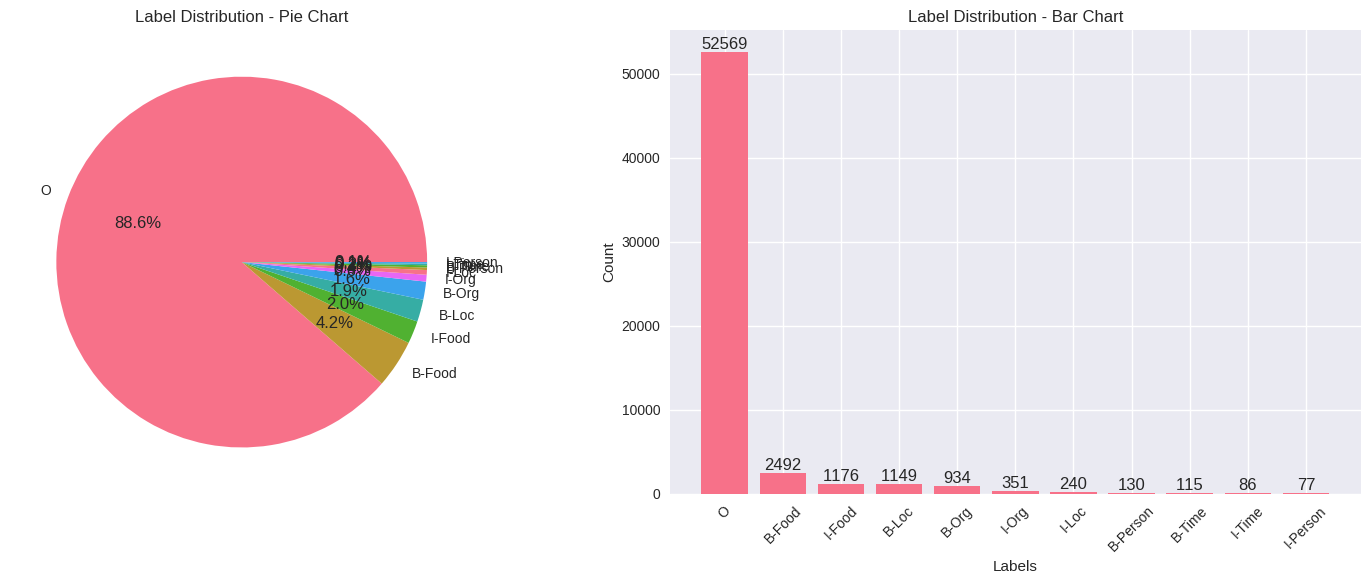


Class Imbalance Ratio (max/min): 682.71

=== ENTITY TYPE DISTRIBUTION ===
Entity_Type  Count  Percentage
 Non-Entity  52569       88.62
       Food   3668        6.18
        Loc   1389        2.34
        Org   1285        2.17
     Person    207        0.35
       Time    201        0.34


In [6]:
# Label distribution
label_counts = Counter(all_labels)
label_df = pd.DataFrame(list(label_counts.items()), columns=['Label', 'Count'])
label_df['Percentage'] = (label_df['Count'] / len(all_labels) * 100).round(2)
label_df = label_df.sort_values('Count', ascending=False)

print("=== LABEL DISTRIBUTION ===")
print(label_df.to_string(index=False))

# Visualize label distribution
plt.figure(figsize=(15, 6))

# Pie chart
plt.subplot(1, 2, 1)
plt.pie(label_df['Count'], labels=label_df['Label'], autopct='%1.1f%%')
plt.title('Label Distribution - Pie Chart')

# Bar plot
plt.subplot(1, 2, 2)
bars = plt.bar(label_df['Label'], label_df['Count'])
plt.title('Label Distribution - Bar Chart')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add count labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Calculate class imbalance ratio
max_count = label_df['Count'].max()
min_count = label_df['Count'].min()
imbalance_ratio = max_count / min_count
print(f"\nClass Imbalance Ratio (max/min): {imbalance_ratio:.2f}")

# Group by entity type
entity_stats = {}
for label in unique_labels:
    if label == 'O':
        entity_stats['Non-Entity'] = label_counts[label]
    else:
        entity_type = label.split('-')[1] if '-' in label else 'Unknown'
        if entity_type not in entity_stats:
            entity_stats[entity_type] = 0
        entity_stats[entity_type] += label_counts[label]

print("\n=== ENTITY TYPE DISTRIBUTION ===")
entity_df = pd.DataFrame(list(entity_stats.items()), columns=['Entity_Type', 'Count'])
entity_df['Percentage'] = (entity_df['Count'] / len(all_labels) * 100).round(2)
entity_df = entity_df.sort_values('Count', ascending=False)
print(entity_df.to_string(index=False))

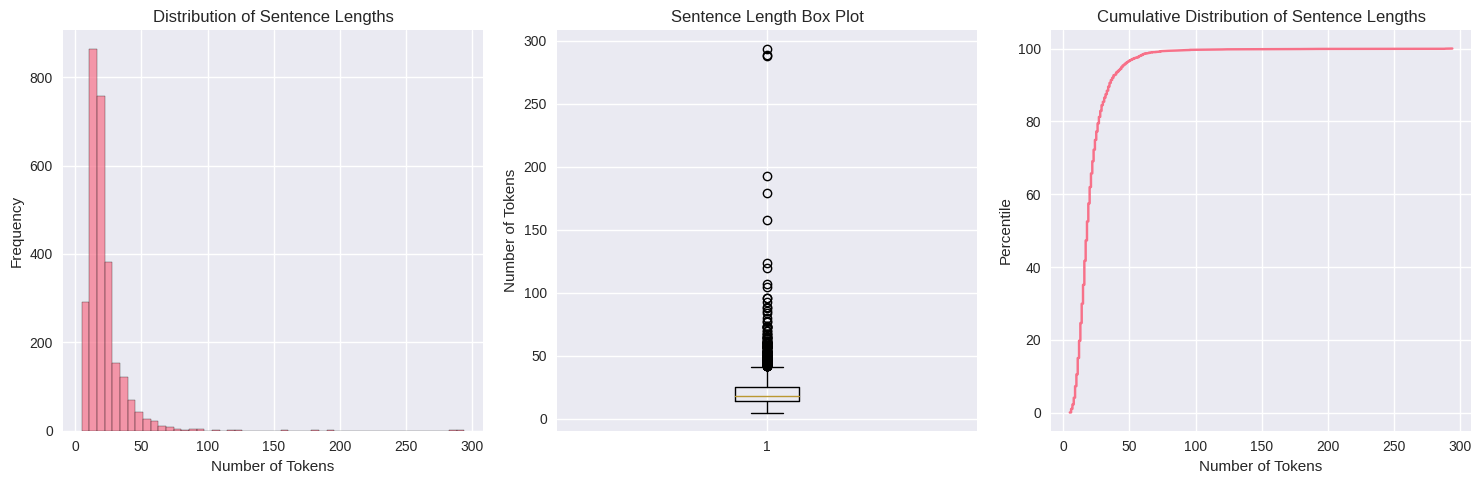

=== SENTENCE LENGTH STATISTICS ===
Mean: 21.42
Median: 18.00
Std: 15.72
25th percentile: 14.00
75th percentile: 25.00
95th percentile: 45.00
99th percentile: 67.96

=== MODELING INSIGHTS ===
90% of sentences have ≤ 35 tokens
95% of sentences have ≤ 45 tokens
99% of sentences have ≤ 68 tokens

Recommended max_seq_length: 45 (covers 95% of data)
Alternative max_seq_length: 67 (covers 99% of data, but may cause memory issues)


In [7]:
# Sentence length analysis
plt.figure(figsize=(15, 5))

# Histogram
plt.subplot(1, 3, 1)
plt.hist(sentence_lengths, bins=50, alpha=0.7, edgecolor='black')
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')

# Box plot
plt.subplot(1, 3, 2)
plt.boxplot(sentence_lengths)
plt.title('Sentence Length Box Plot')
plt.ylabel('Number of Tokens')

# Cumulative distribution
plt.subplot(1, 3, 3)
sorted_lengths = np.sort(sentence_lengths)
percentiles = np.arange(1, len(sorted_lengths) + 1) / len(sorted_lengths) * 100
plt.plot(sorted_lengths, percentiles)
plt.title('Cumulative Distribution of Sentence Lengths')
plt.xlabel('Number of Tokens')
plt.ylabel('Percentile')

plt.tight_layout()
plt.show()

# Statistical summary
print("=== SENTENCE LENGTH STATISTICS ===")
print(f"Mean: {np.mean(sentence_lengths):.2f}")
print(f"Median: {np.median(sentence_lengths):.2f}")
print(f"Std: {np.std(sentence_lengths):.2f}")
print(f"25th percentile: {np.percentile(sentence_lengths, 25):.2f}")
print(f"75th percentile: {np.percentile(sentence_lengths, 75):.2f}")
print(f"95th percentile: {np.percentile(sentence_lengths, 95):.2f}")
print(f"99th percentile: {np.percentile(sentence_lengths, 99):.2f}")

# Find optimal sequence length for modeling
percentile_90 = np.percentile(sentence_lengths, 90)
percentile_95 = np.percentile(sentence_lengths, 95)
percentile_99 = np.percentile(sentence_lengths, 99)

print(f"\n=== MODELING INSIGHTS ===")
print(f"90% of sentences have ≤ {percentile_90:.0f} tokens")
print(f"95% of sentences have ≤ {percentile_95:.0f} tokens")  
print(f"99% of sentences have ≤ {percentile_99:.0f} tokens")
print(f"\nRecommended max_seq_length: {int(percentile_95)} (covers 95% of data)")
print(f"Alternative max_seq_length: {int(percentile_99)} (covers 99% of data, but may cause memory issues)")

In [8]:
# Extract entities from the dataset
def extract_entities(sentence, tags):
    """Extract entities from sentence using BIO tagging"""
    tokens = sentence.split()
    labels = tags.split()
    entities = []
    current_entity = []
    current_label = None
    
    for token, label in zip(tokens, labels):
        if label.startswith('B-'):
            # Start of new entity
            if current_entity:
                entities.append({
                    'entity': ' '.join(current_entity),
                    'label': current_label,
                    'length': len(current_entity)
                })
            current_entity = [token]
            current_label = label[2:]  # Remove 'B-' prefix
        elif label.startswith('I-') and current_label == label[2:]:
            # Continue current entity
            current_entity.append(token)
        else:
            # End current entity
            if current_entity:
                entities.append({
                    'entity': ' '.join(current_entity),
                    'label': current_label,
                    'length': len(current_entity)
                })
            current_entity = []
            current_label = None
    
    # Don't forget the last entity
    if current_entity:
        entities.append({
            'entity': ' '.join(current_entity),
            'label': current_label,
            'length': len(current_entity)
        })
    
    return entities

# Extract all entities
all_entities = []
entities_per_sentence = []

for idx, row in train_df.iterrows():
    entities = extract_entities(row['Sentence'], row['Tag'])
    all_entities.extend(entities)
    entities_per_sentence.append(len(entities))

print("=== ENTITY EXTRACTION STATISTICS ===")
print(f"Total entities found: {len(all_entities)}")
print(f"Average entities per sentence: {np.mean(entities_per_sentence):.2f}")
print(f"Max entities per sentence: {max(entities_per_sentence)}")

# Entity length distribution
entity_lengths = [e['length'] for e in all_entities]
entity_types = [e['label'] for e in all_entities]

print(f"\n=== ENTITY LENGTH STATISTICS ===")
print(f"Average entity length: {np.mean(entity_lengths):.2f} tokens")
print(f"Median entity length: {np.median(entity_lengths):.2f} tokens")
print(f"Max entity length: {max(entity_lengths)} tokens")

# Entity type counts
entity_type_counts = Counter(entity_types)
print(f"\n=== ENTITY TYPE COUNTS ===")
for entity_type, count in entity_type_counts.most_common():
    print(f"{entity_type}: {count} ({count/len(all_entities)*100:.2f}%)")

=== ENTITY EXTRACTION STATISTICS ===
Total entities found: 4820
Average entities per sentence: 1.74
Max entities per sentence: 33

=== ENTITY LENGTH STATISTICS ===
Average entity length: 1.33 tokens
Median entity length: 1.00 tokens
Max entity length: 7 tokens

=== ENTITY TYPE COUNTS ===
Food: 2492 (51.70%)
Loc: 1149 (23.84%)
Org: 934 (19.38%)
Person: 130 (2.70%)
Time: 115 (2.39%)


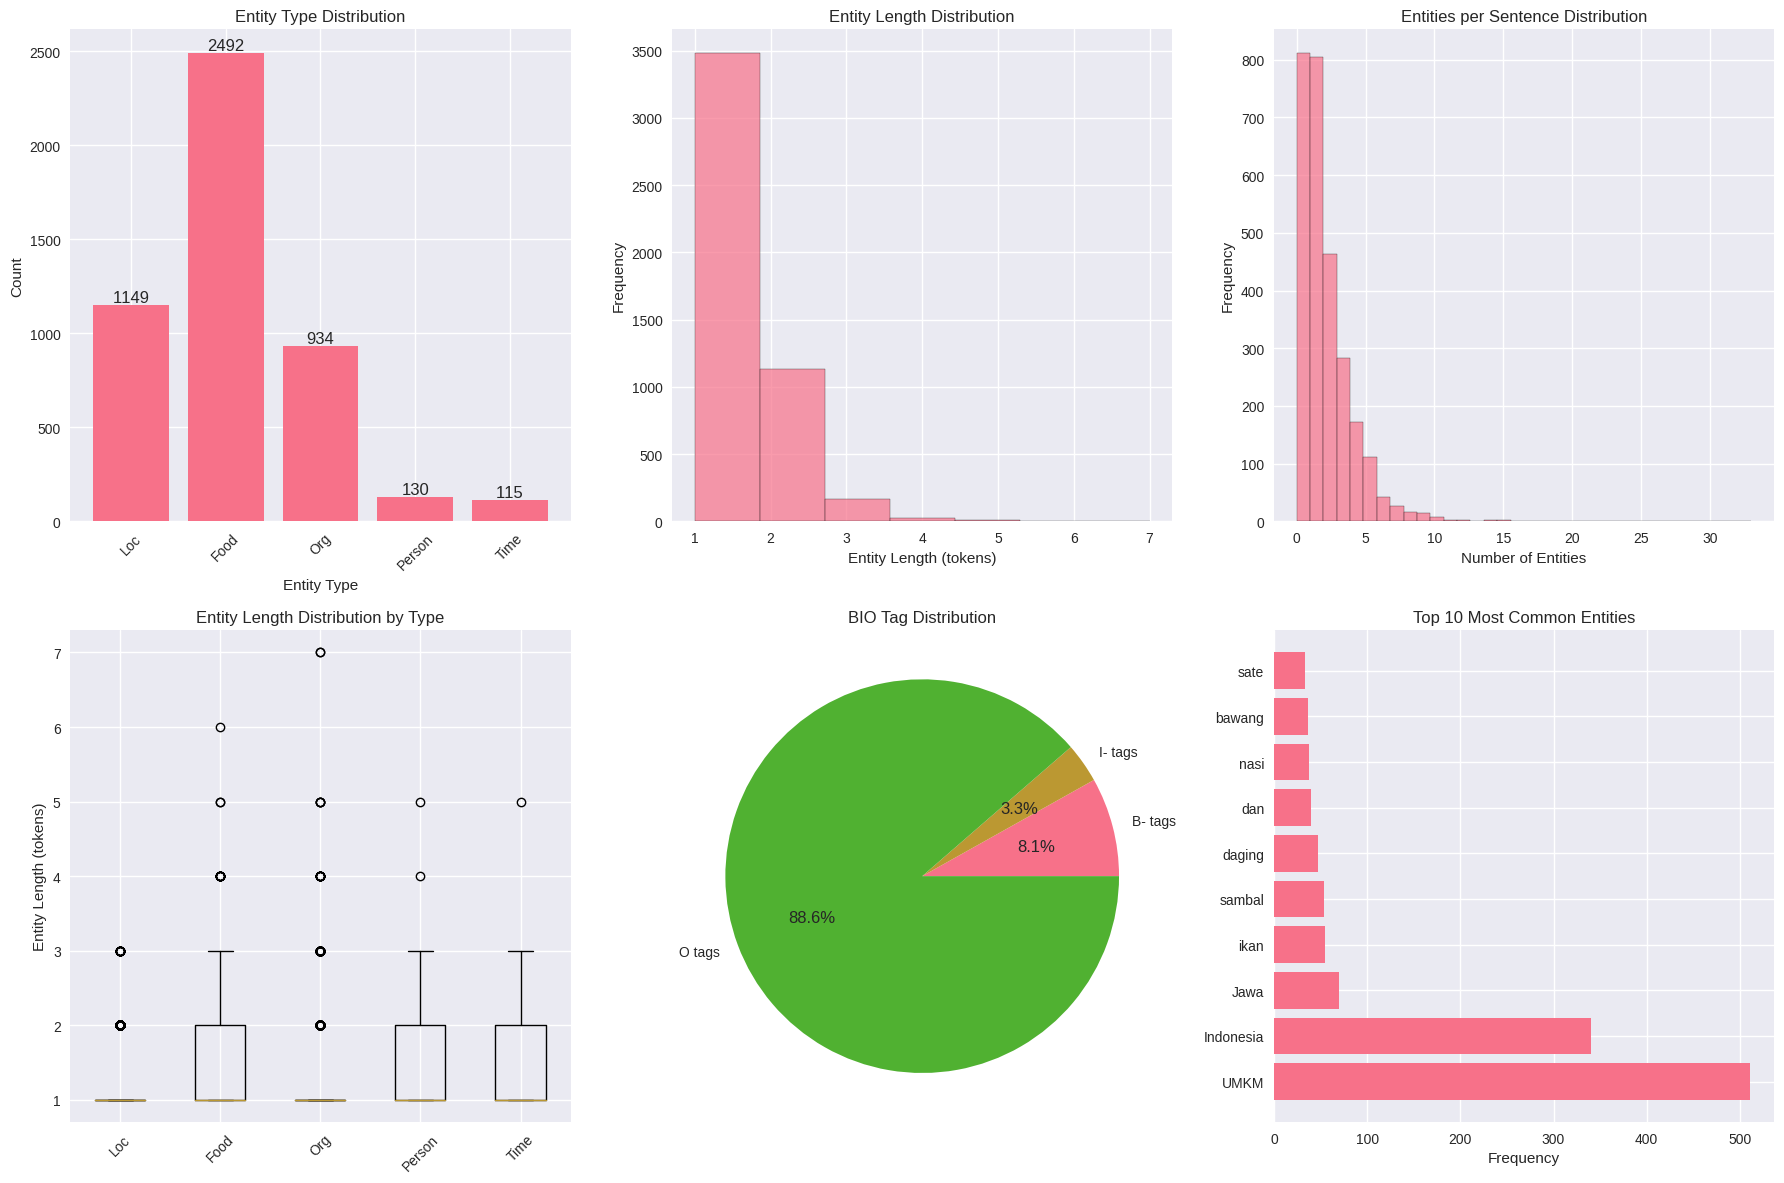

In [9]:
# Visualize entity analysis
plt.figure(figsize=(18, 12))

# Entity type distribution
plt.subplot(2, 3, 1)
entity_type_df = pd.DataFrame(list(entity_type_counts.items()), columns=['Entity_Type', 'Count'])
bars = plt.bar(entity_type_df['Entity_Type'], entity_type_df['Count'])
plt.title('Entity Type Distribution')
plt.xlabel('Entity Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{int(height)}', 
             ha='center', va='bottom')

# Entity length distribution
plt.subplot(2, 3, 2)
plt.hist(entity_lengths, bins=max(entity_lengths), alpha=0.7, edgecolor='black')
plt.title('Entity Length Distribution')
plt.xlabel('Entity Length (tokens)')
plt.ylabel('Frequency')

# Entities per sentence distribution
plt.subplot(2, 3, 3)
plt.hist(entities_per_sentence, bins=max(entities_per_sentence)+1, alpha=0.7, edgecolor='black')
plt.title('Entities per Sentence Distribution')
plt.xlabel('Number of Entities')
plt.ylabel('Frequency')

# Entity length by type
plt.subplot(2, 3, 4)
entity_length_by_type = defaultdict(list)
for entity in all_entities:
    entity_length_by_type[entity['label']].append(entity['length'])

box_data = [entity_length_by_type[entity_type] for entity_type in entity_type_counts.keys()]
plt.boxplot(box_data, labels=list(entity_type_counts.keys()))
plt.title('Entity Length Distribution by Type')
plt.ylabel('Entity Length (tokens)')
plt.xticks(rotation=45)

# B- vs I- tag distribution
plt.subplot(2, 3, 5)
b_tags = [label for label in all_labels if label.startswith('B-')]
i_tags = [label for label in all_labels if label.startswith('I-')]
o_tags = [label for label in all_labels if label == 'O']

tag_types = ['B- tags', 'I- tags', 'O tags']
tag_counts = [len(b_tags), len(i_tags), len(o_tags)]

plt.pie(tag_counts, labels=tag_types, autopct='%1.1f%%')
plt.title('BIO Tag Distribution')

# Most common entities
plt.subplot(2, 3, 6)
entity_texts = [e['entity'] for e in all_entities]
most_common_entities = Counter(entity_texts).most_common(10)
entities, counts = zip(*most_common_entities)
y_pos = np.arange(len(entities))
plt.barh(y_pos, counts)
plt.yticks(y_pos, [e[:20] + '...' if len(e) > 20 else e for e in entities])
plt.xlabel('Frequency')
plt.title('Top 10 Most Common Entities')

plt.tight_layout()
plt.show()

In [10]:
# Vocabulary analysis
token_counts = Counter(all_tokens)
vocabulary_size = len(token_counts)

print("=== VOCABULARY STATISTICS ===")
print(f"Total unique tokens (vocabulary size): {vocabulary_size}")
print(f"Total tokens: {len(all_tokens)}")
print(f"Average token frequency: {len(all_tokens)/vocabulary_size:.2f}")

# Most and least common tokens
print(f"\n=== MOST COMMON TOKENS ===")
for token, count in token_counts.most_common(20):
    print(f"'{token}': {count}")

print(f"\n=== TOKEN FREQUENCY DISTRIBUTION ===")
freq_counts = Counter(token_counts.values())
singleton_count = freq_counts[1]  # Tokens that appear only once
print(f"Tokens appearing only once (singletons): {singleton_count} ({singleton_count/vocabulary_size*100:.2f}%)")
print(f"Tokens appearing 2+ times: {vocabulary_size - singleton_count} ({(vocabulary_size-singleton_count)/vocabulary_size*100:.2f}%)")

# Token length analysis
token_lengths = [len(token) for token in all_tokens]
print(f"\n=== TOKEN LENGTH STATISTICS ===")
print(f"Average token length: {np.mean(token_lengths):.2f} characters")
print(f"Median token length: {np.median(token_lengths):.2f} characters")
print(f"Max token length: {max(token_lengths)} characters")
print(f"Min token length: {min(token_lengths)} characters")

# Find longest tokens
longest_tokens = [(token, len(token)) for token, _ in token_counts.most_common()]
longest_tokens.sort(key=lambda x: x[1], reverse=True)
print(f"\n=== LONGEST TOKENS ===")
for token, length in longest_tokens[:10]:
    print(f"'{token}' ({length} chars)")

# Character analysis
all_chars = ''.join(all_tokens)
char_counts = Counter(all_chars)
print(f"\n=== CHARACTER STATISTICS ===")
print(f"Unique characters: {len(char_counts)}")
print(f"Most common characters: {char_counts.most_common(10)}")

# Check for special characters or patterns
special_patterns = {
    'numbers': sum(1 for token in all_tokens if any(c.isdigit() for c in token)),
    'punctuation': sum(1 for token in all_tokens if any(c in '.,;:!?"()[]{}' for c in token)),
    'uppercase': sum(1 for token in all_tokens if token.isupper()),
    'mixed_case': sum(1 for token in all_tokens if token != token.lower() and token != token.upper()),
    'all_caps': sum(1 for token in all_tokens if token.isupper() and len(token) > 1)
}

print(f"\n=== SPECIAL PATTERNS ===")
for pattern, count in special_patterns.items():
    print(f"{pattern.capitalize()}: {count} ({count/len(all_tokens)*100:.2f}%)")

=== VOCABULARY STATISTICS ===
Total unique tokens (vocabulary size): 10909
Total tokens: 59319
Average token frequency: 5.44

=== MOST COMMON TOKENS ===
'yang': 2217
'dan': 1836
'di': 930
'dengan': 915
'dari': 618
'ini': 599
'kuliner': 562
'UMKM': 535
'untuk': 483
'dalam': 444
'makanan': 393
'khas': 378
'Indonesia': 377
'###': 361
'juga': 325
'adalah': 315
'menjadi': 300
'atau': 254
'lokal': 249
'seperti': 240

=== TOKEN FREQUENCY DISTRIBUTION ===
Tokens appearing only once (singletons): 5974 (54.76%)
Tokens appearing 2+ times: 4935 (45.24%)

=== TOKEN LENGTH STATISTICS ===
Average token length: 6.67 characters
Median token length: 6.00 characters
Max token length: 364 characters
Min token length: 1 characters

=== LONGEST TOKENS ===
'Sekarang](https://account.kompas.id/register?next=https%3A%2F%2Fwww.kompas.id%2Fartikel%2Fproduk-kuliner-umkm-lokal-banjarmasin-dipromosikan%3Fstatus%3Dsukses_login%26utm_source%3Dkompasid%26utm_medium%3Dlogin_paywall%26utm_campaign%3Dlogin%26utm_content%

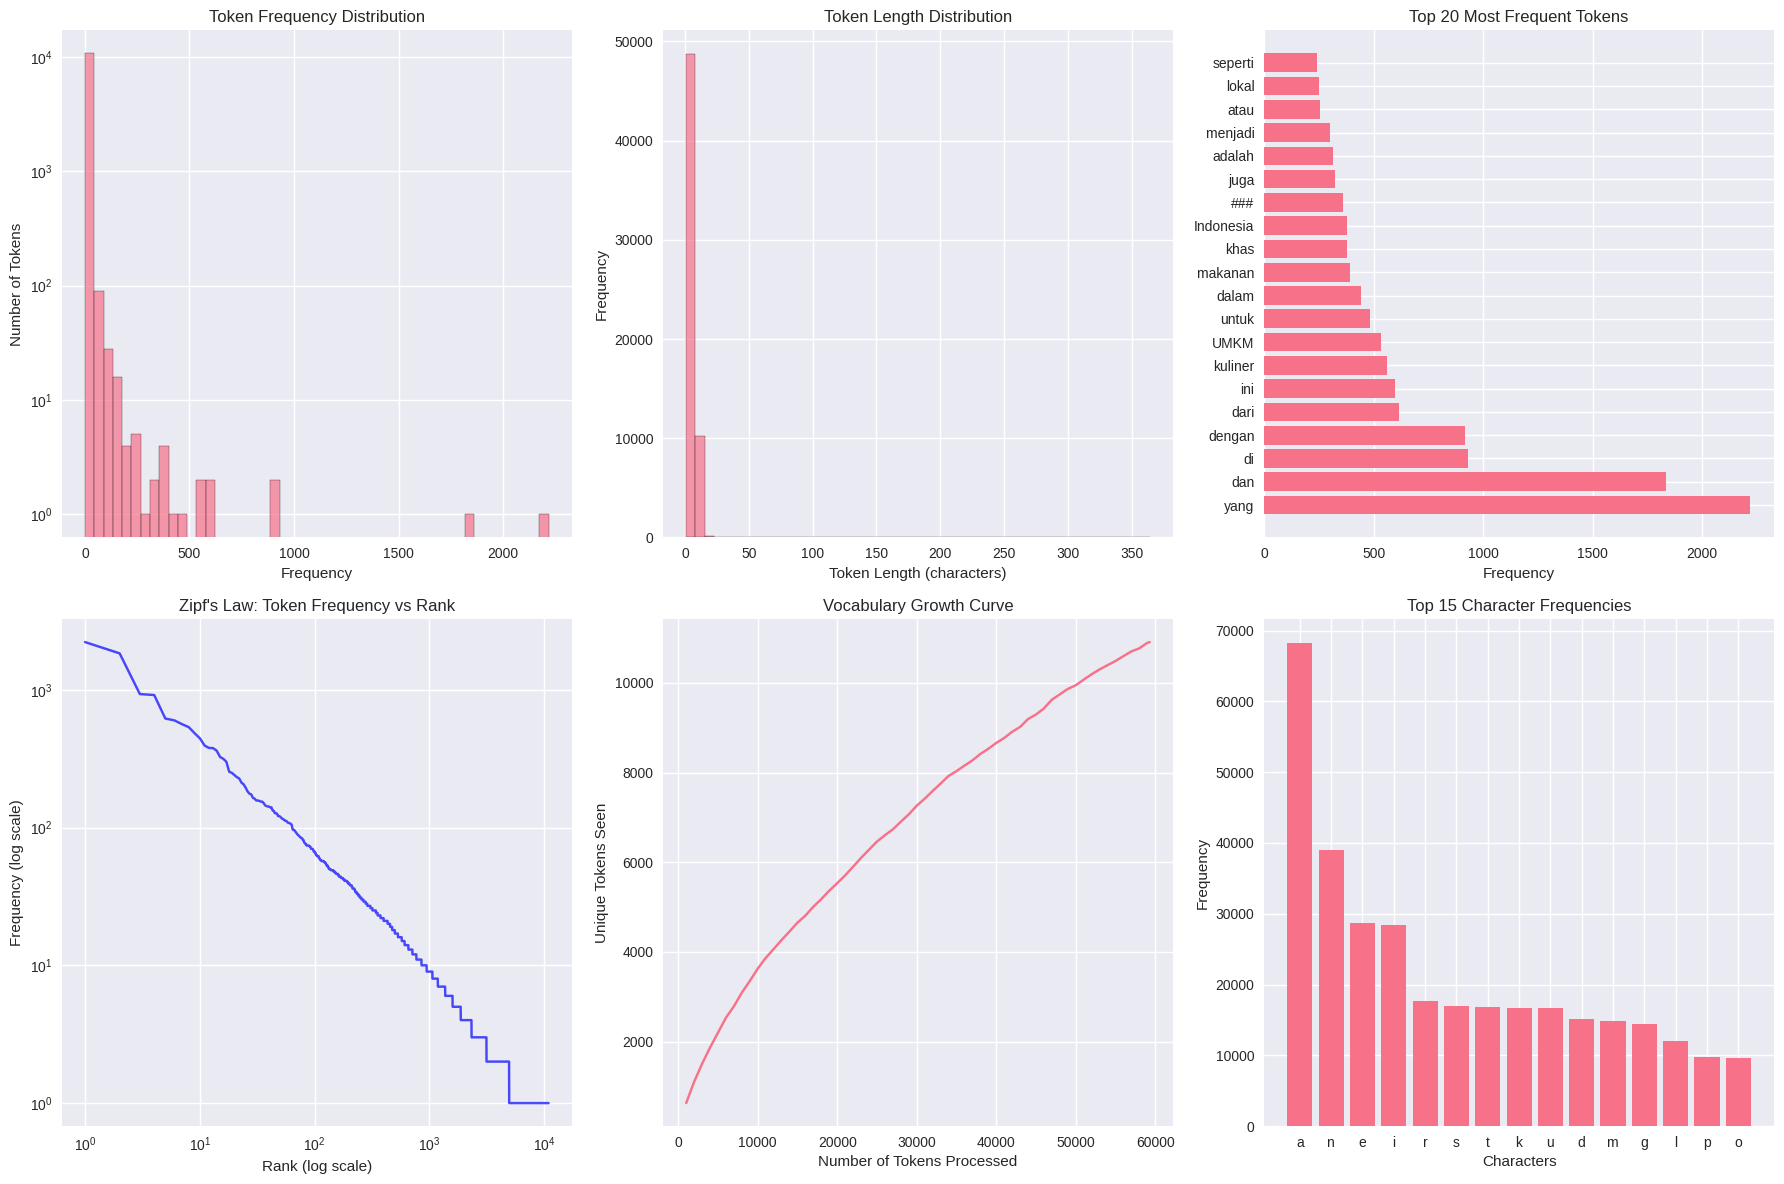


=== VOCABULARY INSIGHTS FOR MODELING ===
Vocabulary size: 10909
Recommended vocab_size for modeling: 10909 (cap at 30k for efficiency)
Consider subword tokenization (BPE/SentencePiece) if vocab is too large
Singleton ratio: 54.8% (high ratio suggests need for robust OOV handling)


In [11]:
# Visualize vocabulary statistics
plt.figure(figsize=(18, 12))

# Token frequency distribution
plt.subplot(2, 3, 1)
frequencies = list(token_counts.values())
plt.hist(frequencies, bins=50, alpha=0.7, edgecolor='black')
plt.title('Token Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Number of Tokens')
plt.yscale('log')

# Token length distribution  
plt.subplot(2, 3, 2)
plt.hist(token_lengths, bins=50, alpha=0.7, edgecolor='black')
plt.title('Token Length Distribution')
plt.xlabel('Token Length (characters)')
plt.ylabel('Frequency')

# Top tokens by frequency
plt.subplot(2, 3, 3)
top_20_tokens = token_counts.most_common(20)
tokens, counts = zip(*top_20_tokens)
y_pos = np.arange(len(tokens))
plt.barh(y_pos, counts)
plt.yticks(y_pos, [t[:15] + '...' if len(t) > 15 else t for t in tokens])
plt.xlabel('Frequency')
plt.title('Top 20 Most Frequent Tokens')

# Zipf's law check
plt.subplot(2, 3, 4)
ranks = np.arange(1, len(token_counts) + 1)
sorted_frequencies = sorted(token_counts.values(), reverse=True)
plt.loglog(ranks, sorted_frequencies, 'b-', alpha=0.7)
plt.title("Zipf's Law: Token Frequency vs Rank")
plt.xlabel('Rank (log scale)')
plt.ylabel('Frequency (log scale)')

# Vocabulary growth curve
plt.subplot(2, 3, 5)
vocab_growth = []
seen_tokens = set()
for i, token in enumerate(all_tokens, 1):
    seen_tokens.add(token)
    if i % 1000 == 0 or i == len(all_tokens):
        vocab_growth.append((i, len(seen_tokens)))

x_vals, y_vals = zip(*vocab_growth)
plt.plot(x_vals, y_vals)
plt.title('Vocabulary Growth Curve')
plt.xlabel('Number of Tokens Processed')
plt.ylabel('Unique Tokens Seen')

# Character frequency
plt.subplot(2, 3, 6)
top_chars = char_counts.most_common(15)
chars, char_freq = zip(*top_chars)
plt.bar(range(len(chars)), char_freq)
plt.title('Top 15 Character Frequencies')
plt.xlabel('Characters')
plt.ylabel('Frequency')
plt.xticks(range(len(chars)), chars)

plt.tight_layout()
plt.show()

print(f"\n=== VOCABULARY INSIGHTS FOR MODELING ===")
print(f"Vocabulary size: {vocabulary_size}")
print(f"Recommended vocab_size for modeling: {min(vocabulary_size, 30000)} (cap at 30k for efficiency)")
print(f"Consider subword tokenization (BPE/SentencePiece) if vocab is too large")
print(f"Singleton ratio: {singleton_count/vocabulary_size*100:.1f}% (high ratio suggests need for robust OOV handling)")

In [12]:
# Data quality assessment
print("=== DATA QUALITY ASSESSMENT ===")

# Check for consistency in BIO tagging
inconsistency_count = 0
tag_sequence_issues = []

for idx, row in train_df.iterrows():
    tokens, labels = parse_sentence_tags(row['Sentence'], row['Tag'])
    
    # Check if number of tokens matches number of labels
    if len(tokens) != len(labels):
        inconsistency_count += 1
        tag_sequence_issues.append(f"Row {idx}: Token count ({len(tokens)}) != Label count ({len(labels)})")
        continue
    
    # Check BIO tagging consistency
    for i, label in enumerate(labels):
        if label.startswith('I-'):
            entity_type = label[2:]
            # I- tag should be preceded by B- or I- of same type
            if i == 0 or (not labels[i-1].startswith('B-') and not labels[i-1].startswith('I-')) or labels[i-1][2:] != entity_type:
                tag_sequence_issues.append(f"Row {idx}, Token {i}: I-{entity_type} not preceded by B-{entity_type} or I-{entity_type}")

print(f"Inconsistent rows (token-label mismatch): {inconsistency_count}")
print(f"BIO tagging issues found: {len(tag_sequence_issues)}")

if tag_sequence_issues[:5]:  # Show first 5 issues
    print("\nFirst 5 BIO tagging issues:")
    for issue in tag_sequence_issues[:5]:
        print(f"  - {issue}")

# Check for empty sentences or labels
empty_sentences = train_df[train_df['Sentence'].str.strip() == ''].shape[0]
empty_tags = train_df[train_df['Tag'].str.strip() == ''].shape[0]
print(f"\nEmpty sentences: {empty_sentences}")
print(f"Empty tag sequences: {empty_tags}")

# Check for unusual characters
unusual_chars = set()
for sentence in train_df['Sentence']:
    for char in sentence:
        if ord(char) > 127:  # Non-ASCII characters
            unusual_chars.add(char)

print(f"\nNon-ASCII characters found: {len(unusual_chars)}")
if len(unusual_chars) <= 20:
    print(f"Non-ASCII chars: {sorted(unusual_chars)}")
else:
    print(f"First 20 non-ASCII chars: {sorted(list(unusual_chars))[:20]}")

# Label validation
expected_labels = {'O', 'B-Food', 'I-Food', 'B-Loc', 'I-Loc', 'B-Org', 'I-Org', 'B-Person', 'I-Person', 'B-Time', 'I-Time'}
actual_labels = set(all_labels)
unexpected_labels = actual_labels - expected_labels
missing_labels = expected_labels - actual_labels

print(f"\n=== LABEL VALIDATION ===")
print(f"Expected labels: {len(expected_labels)}")
print(f"Actual unique labels: {len(actual_labels)}")
print(f"Unexpected labels: {unexpected_labels}")
print(f"Missing labels: {missing_labels}")

# Sample quality check
print(f"\n=== SAMPLE QUALITY EXAMPLES ===")
print("Random samples from dataset:")
sample_indices = np.random.choice(len(train_df), 3, replace=False)
for i, idx in enumerate(sample_indices):
    print(f"\nSample {i+1} (Row {idx}):")
    row = train_df.iloc[idx]
    tokens, labels = parse_sentence_tags(row['Sentence'], row['Tag'])
    print(f"Sentence: {row['Sentence'][:100]}...")
    print(f"Tokens: {tokens[:10]}...")  
    print(f"Labels: {labels[:10]}...")
    entities = extract_entities(row['Sentence'], row['Tag'])
    if entities:
        print(f"Entities: {[(e['entity'], e['label']) for e in entities[:3]]}")
    else:
        print("Entities: None")

=== DATA QUALITY ASSESSMENT ===
Inconsistent rows (token-label mismatch): 0
BIO tagging issues found: 264

First 5 BIO tagging issues:
  - Row 1, Token 15: I-Food not preceded by B-Food or I-Food
  - Row 55, Token 4: I-Loc not preceded by B-Loc or I-Loc
  - Row 57, Token 8: I-Food not preceded by B-Food or I-Food
  - Row 78, Token 37: I-Time not preceded by B-Time or I-Time
  - Row 85, Token 33: I-Org not preceded by B-Org or I-Org

Empty sentences: 0
Empty tag sequences: 0

Non-ASCII characters found: 19
Non-ASCII chars: ['à', 'é', 'ë', 'ό', '–', '—', '‘', '’', '“', '”', '•', '…', '✅', '🇩', '🇮', '🌱', '💡', '💪', '📍']

=== LABEL VALIDATION ===
Expected labels: 11
Actual unique labels: 11
Unexpected labels: set()
Missing labels: set()

=== SAMPLE QUALITY EXAMPLES ===
Random samples from dataset:

Sample 1 (Row 1693):
Sentence: Setelah matang, rendang dapat bertahan hingga berminggu-minggu. ### 4\ Gulai ikan patin, Provinsi Ja...
Tokens: ['Setelah', 'matang,', 'rendang', 'dapat', 'bertahan

# Analisis

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch. nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModel, get_linear_schedule_with_warmup
from torch.optim import AdamW
from sklearn.metrics import f1_score, classification_report
from sklearn. model_selection import train_test_split
from tqdm import tqdm
from TorchCRF import CRF
import warnings
warnings.filterwarnings('ignore')

# Set random seeds
def set_seed(seed=42):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda. is_available():
        torch.cuda. manual_seed_all(seed)
set_seed(42)

# Device
device = torch.device('cuda' if torch. cuda.is_available() else 'cpu')
print(f"Using device: {device}")

In [ ]:
# =============================================================================
# 1. DATA PROCESSOR
# =============================================================================
class NERDataProcessor:
    def __init__(self):
        self.label2id = {
            'O': 0, 'B-Food': 1, 'I-Food': 2, 'B-Loc': 3, 'I-Loc': 4,
            'B-Org': 5, 'I-Org': 6, 'B-Person': 7, 'I-Person': 8,
            'B-Time': 9, 'I-Time': 10
        }
        self.id2label = {v: k for k, v in self.label2id. items()}

    def parse_tags(self, tag_string):
        return tag_string.strip().split()

    def parse_sentence(self, sentence):
        return sentence. strip().split()

    def load_data(self, filepath, is_test=False):
        df = pd.read_csv(filepath)
        sentences = []
        labels = []
        for idx, row in df.iterrows():
            tokens = self.parse_sentence(row['Sentence'])
            if not is_test:
                tags = self.parse_tags(row['Tag'])
                min_len = min(len(tokens), len(tags))
                tokens = tokens[:min_len]
                tags = tags[:min_len]
                tag_ids = [self.label2id. get(tag, 0) for tag in tags]
                sentences.append(tokens)
                labels.append(tag_ids)
            else:
                sentences.append(tokens)
                labels.append(None)
        return sentences, labels, df

In [ ]:
# =============================================================================
# 2. DATASET (SLIDING WINDOW - FIXED)
# =============================================================================
class NERDataset(Dataset):
    def __init__(self, sentences, labels, tokenizer, max_len=128, stride=64, is_test=False):
        self. tokenizer = tokenizer
        self.max_len = max_len
        self.stride = stride
        self.is_test = is_test
        self.sentences = sentences
        self.labels = labels
        
        # Expand sentences into chunks
        self.chunks = []
        
        for sent_idx, tokens in enumerate(sentences):
            sent_labels = labels[sent_idx] if labels and labels[sent_idx] is not None else None
            
            # Account for [CLS] and [SEP] tokens
            effective_max_len = max_len - 2
            
            if len(tokens) <= effective_max_len:
                # Sentence fits in one chunk
                self. chunks.append({
                    'tokens': tokens,
                    'labels': sent_labels,
                    'sent_idx': sent_idx,
                    'start': 0,
                    'end': len(tokens),
                    'total_len': len(tokens)
                })
            else:
                # Sliding window for long sentences
                start = 0
                while start < len(tokens):
                    end = min(start + effective_max_len, len(tokens))
                    chunk_tokens = tokens[start:end]
                    chunk_labels = sent_labels[start:end] if sent_labels else None
                    
                    self.chunks.append({
                        'tokens': chunk_tokens,
                        'labels': chunk_labels,
                        'sent_idx': sent_idx,
                        'start': start,
                        'end': end,
                        'total_len': len(tokens)
                    })
                    
                    # Move to next chunk
                    if end >= len(tokens):
                        break
                    start += stride

    def __len__(self):
        return len(self.chunks)

    def __getitem__(self, idx):
        chunk = self. chunks[idx]
        tokens = chunk['tokens']

        encoding = self.tokenizer(
            tokens,
            is_split_into_words=True,
            padding='max_length',
            truncation=True,
            max_length=self.max_len,
            return_tensors='pt'
        )

        input_ids = encoding['input_ids'].flatten()
        attention_mask = encoding['attention_mask'].flatten()

        # word_ids
        word_ids_list = encoding.word_ids()
        word_ids_tensor = torch.full((self.max_len,), fill_value=-1, dtype=torch. long)
        for i, wid in enumerate(word_ids_list):
            if wid is not None:
                word_ids_tensor[i] = wid

        item = {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'word_ids': word_ids_tensor,
            'sent_idx': chunk['sent_idx'],
            'start': chunk['start'],
            'end': chunk['end'],
            'total_len': chunk['total_len'],
        }

        if not self.is_test and chunk['labels'] is not None:
            raw_labels = chunk['labels']
            aligned_labels = []
            prev_wid = None
            for wid in word_ids_list:
                if wid is None:
                    aligned_labels.append(0)
                elif wid != prev_wid:
                    aligned_labels. append(raw_labels[wid] if wid < len(raw_labels) else 0)
                else:
                    aligned_labels.append(raw_labels[wid] if wid < len(raw_labels) else 0)
                prev_wid = wid
            item['labels'] = torch.tensor(aligned_labels, dtype=torch.long)
        else:
            item['labels'] = torch.zeros(self. max_len, dtype=torch.long)

        return item

In [ ]:
class NERModel(nn.Module):
    def __init__(self, model_name, num_labels, dropout=0.3):
        super().__init__()
        self.bert = AutoModel.from_pretrained(model_name)
        self.dropout = nn.Dropout(dropout)
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_labels)
        # TorchCRF: CRF(num_labels)
        self.crf = CRF(num_labels)
        self.num_labels = num_labels

    def forward(self, input_ids, attention_mask, labels=None):
        # BERT forward
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        sequence_output = self.dropout(outputs[0])  # (batch, seq_len, hidden)
        emissions = self.classifier(sequence_output)  # (batch, seq_len, num_labels)

        loss = None
        if labels is not None:
            # TorchCRF EXPECTS:
            #   hidden/emissions: (batch, seq_len, num_labels)
            #   labels          : (batch, seq_len)
            #   mask            : (batch, seq_len) Byte/Bool
            mask = attention_mask.bool()

            # crf.forward mengembalikan tensor [batch_size]
            log_likelihood = self.crf.forward(emissions, labels, mask)

            # jadikan skalar
            if log_likelihood.dim() > 0:
                loss = -log_likelihood.mean()
            else:
                loss = -log_likelihood

        return loss, emissions

    def decode(self, emissions, mask):
        """
        emissions: (batch, seq_len, num_labels)
        mask     : (batch, seq_len)
        return   : list of length batch, tiap elemen list[int]
        """
        # TorchCRF pakai viterbi_decode
        # mask bisa bool atau byte
        tag_mask = mask.bool()
        decoded = self.crf.viterbi_decode(emissions, tag_mask)
        # decoded: List[List[int]] dengan len(decoded) = batch_size
        return decoded

In [ ]:
# =============================================================================
# 4. TRAINING & EVALUATION
# =============================================================================
def train_epoch(model, dataloader, optimizer, scheduler, device):
    model.train()
    total_loss = 0
    for batch in tqdm(dataloader, desc='Training'):
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask']. to(device)
        labels = batch['labels'].to(device)
        loss, _ = model(input_ids, attention_mask, labels)
        loss.backward()
        torch.nn.utils. clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler. step()
        total_loss += loss. item()
    return total_loss / len(dataloader)

def evaluate(model, dataloader, device, processor):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for batch in tqdm(dataloader, desc='Evaluating'):
            input_ids = batch['input_ids']. to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            word_ids_batch = batch['word_ids']
            
            _, emissions = model(input_ids, attention_mask)
            crf_mask = attention_mask.bool()
            decoded = model.decode(emissions, crf_mask)
            
            for i in range(len(decoded)):
                word_ids = word_ids_batch[i].numpy()
                label_seq = labels[i].cpu().numpy()
                pred_seq = decoded[i]
                
                prev_wid = None
                for j, wid in enumerate(word_ids):
                    if wid != -1 and wid != prev_wid:
                        if j < len(pred_seq):
                            all_preds.append(pred_seq[j])
                            all_labels.append(label_seq[j])
                        prev_wid = wid
                        
    micro_f1 = f1_score(all_labels, all_preds, average='micro')
    macro_f1 = f1_score(all_labels, all_preds, average='macro')
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds,
                                target_names=[processor.id2label[i] for i in range(len(processor.id2label))],
                                zero_division=0))
    return micro_f1, macro_f1

In [ ]:
# =============================================================================
# 5. PREDICTION (SLIDING WINDOW - FIXED)
# =============================================================================
def predict(model, dataloader, device, processor, num_sentences, sentences):
    model. eval()
    
    # Initialize predictions for each sentence with None to track unpredicted positions
    all_predictions = [[None] * len(sent) for sent in sentences]
    
    with torch.no_grad():
        for batch in tqdm(dataloader, desc='Predicting'):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            word_ids_batch = batch['word_ids']
            sent_indices = batch['sent_idx']
            starts = batch['start']
            
            _, emissions = model(input_ids, attention_mask)
            crf_mask = attention_mask.bool()
            decoded = model.decode(emissions, crf_mask)
            
            for i in range(input_ids.size(0)):
                pred_seq = decoded[i]
                word_ids = word_ids_batch[i].numpy()
                sent_idx = sent_indices[i].item()
                start = starts[i].item()
                
                # Map predictions back to original positions
                prev_wid = None
                for j, wid in enumerate(word_ids):
                    if wid != -1 and wid != prev_wid:
                        if j < len(pred_seq):
                            # Calculate original position in the sentence
                            original_pos = start + wid
                            if original_pos < len(sentences[sent_idx]):
                                # Only update if not already predicted (first chunk wins)
                                if all_predictions[sent_idx][original_pos] is None:
                                    all_predictions[sent_idx][original_pos] = processor.id2label[pred_seq[j]]
                        prev_wid = wid
    
    # Fill any remaining None values with 'O' and ensure correct length
    final_predictions = []
    for sent_idx, sent in enumerate(sentences):
        sent_preds = []
        for pos in range(len(sent)):
            if pos < len(all_predictions[sent_idx]) and all_predictions[sent_idx][pos] is not None:
                sent_preds.append(all_predictions[sent_idx][pos])
            else:
                sent_preds.append('O')
        final_predictions.append(sent_preds)
    
    return final_predictions

In [ ]:
# =============================================================================
# 6. EKSEKUSI LANGSUNG (TANPA def main)
# =============================================================================
MODEL_NAME = 'cahya/xlm-roberta-large-indonesian-NER'
MAX_LEN = 256
STRIDE = 64
BATCH_SIZE = 2  # Reduced batch size for XLM-RoBERTa
EPOCHS = 3
LEARNING_RATE = 1e-5  # Lower learning rate for XLM-RoBERTa

processor = NERDataProcessor()
print(f"Label mapping: {processor.label2id}")

# Load data
train_sentences, train_labels, train_df = processor.load_data('/kaggle/input/data-mining-final-action-2025/train.csv')
test_sentences, _, test_df = processor. load_data('/kaggle/input/data-mining-final-action-2025/test.csv', is_test=True)

print(f"Train samples: {len(train_sentences)}, Test samples: {len(test_sentences)}")

# Check max lengths
max_train_len = max(len(s) for s in train_sentences)
max_test_len = max(len(s) for s in test_sentences)
print(f"Max train sentence length: {max_train_len}")
print(f"Max test sentence length: {max_test_len}")

# Split train-val
train_sent, val_sent, train_lab, val_lab = train_test_split(
    train_sentences, train_labels, test_size=0.1, random_state=42)

# Tokenizer
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

# Datasets (with sliding window)
train_dataset = NERDataset(train_sent, train_lab, tokenizer, MAX_LEN, STRIDE, is_test=False)
val_dataset = NERDataset(val_sent, val_lab, tokenizer, MAX_LEN, STRIDE, is_test=False)
test_dataset = NERDataset(test_sentences, None, tokenizer, MAX_LEN, STRIDE, is_test=True)

print(f"Train chunks: {len(train_dataset)}, Val chunks: {len(val_dataset)}, Test chunks: {len(test_dataset)}")

# Dataloaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Model (with CRF)
model = NERModel(MODEL_NAME, num_labels=len(processor.label2id))
model.to(device)

# Optimizer & scheduler
optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)
total_steps = len(train_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=int(0.1*total_steps), num_training_steps=total_steps)

# Training
best_f1 = 0
for epoch in range(EPOCHS):
    print(f"\nEpoch {epoch+1}/{EPOCHS}")
    train_loss = train_epoch(model, train_loader, optimizer, scheduler, device)
    print(f"Train Loss: {train_loss:.4f}")
    micro_f1, macro_f1 = evaluate(model, val_loader, device, processor)
    print(f"Val Micro F1: {micro_f1:.4f} | Macro F1: {macro_f1:.4f}")
    if micro_f1 > best_f1:
        best_f1 = micro_f1
        torch.save(model.state_dict(), '/kaggle/working/best_ner_model.pt')
        print(f"New best model saved!  (Micro F1: {best_f1:.4f})")

# Load best model
model. load_state_dict(torch.load('/kaggle/working/best_ner_model.pt'))

# Predict test (with sliding window reconstruction)
predictions = predict(model, test_loader, device, processor, len(test_sentences), test_sentences)

# Validate predictions length
print("\nValidating prediction lengths...")
mismatch_count = 0
for idx, (pred_tags, sent) in enumerate(zip(predictions, test_sentences)):
    if len(pred_tags) != len(sent):
        mismatch_count += 1
        print(f"Mismatch at {test_df.iloc[idx]['id']}: pred={len(pred_tags)}, sent={len(sent)}")
print(f"Total mismatches: {mismatch_count}")

# Create submission
submission_data = []
for idx, pred_tags in enumerate(predictions):
    tag_string = ' '.join(pred_tags)
    submission_data. append({'id': test_df.iloc[idx]['id'], 'Tag': tag_string})

submission_df = pd. DataFrame(submission_data)
submission_df.to_csv('/kaggle/working/submission.csv', index=False)
print("\nSubmission saved to /kaggle/working/submission.csv")
print(f"Total test predictions: {len(submission_df)}")

# Sample output
print("\nSample Predictions:")
for i in range(min(5, len(test_sentences))):
    print(f"\n{i+1}. {' '.join(test_sentences[i])}")
    print(f"    -> {' '.join(predictions[i])}")

# Cleanup memory
del train_sentences, train_labels, train_df, test_sentences, test_df, train_sent, val_sent, train_lab, val_lab, tokenizer, train_dataset, val_dataset, test_dataset, train_loader, val_loader, test_loader, model, optimizer, scheduler, predictions, submission_data, submission_df
import gc
gc.collect()
if torch.cuda.is_available():
    torch.cuda.empty_cache()